- This simulation is to test the runs that can take place in jupyter-notebook in cluster
- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [1]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/home/rk/pestpp/pestpp/rk_model_final_4yrs


In [2]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

In [4]:
import warnings
warnings.filterwarnings('ignore')

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [5]:
directory_name = 'Case1_B_cv_rw_slurm_jn.demo'
cf_name = 'Case1_B_cv_cf_v1_rw' # Control file name

In [6]:
directory_name

'Case1_B_cv_rw_slurm_jn.demo'

#### b. Parameter Sensitivity 

In [7]:
sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
1,0.000024,0.000295,7.264320e-07,0.000001,0.000014,0.000013,0.000004,4.630050e-07,0.000004,4.348850e-07,6.756710e-08,6.340790e-08,0.000002,4.980230e-08,0.000005,0.000005,930.791,1480740.0,4.510190e-11,1.755020e-10
2,0.000023,0.000304,7.214430e-07,0.000002,0.000014,0.000013,0.000004,4.532540e-07,0.000004,4.207420e-07,6.438940e-08,5.507650e-08,0.000002,1.427820e-08,0.000005,0.000005,685.109,5759340.0,6.823610e-11,1.804700e-10
3,0.000095,0.000399,2.308090e-06,0.000002,0.000013,0.000013,0.000005,4.950890e-07,0.000004,4.695150e-07,1.584500e-07,6.667330e-08,0.000002,7.956730e-09,0.000006,0.000005,2414.910,6163670.0,1.441090e-08,6.827750e-09
4,0.000251,0.001050,2.523360e-06,0.000001,0.000013,0.000014,0.000004,4.055480e-07,0.000004,3.217490e-07,3.105210e-07,5.503580e-08,0.000002,2.453040e-08,0.000006,0.000007,2815.440,4330990.0,1.440730e-08,6.823710e-09
5,0.000251,0.001050,2.523360e-06,0.000001,0.000013,0.000014,0.000004,4.055480e-07,0.000004,3.217490e-07,3.105210e-07,5.503580e-08,0.000002,2.508160e-08,0.000006,0.000007,2830.530,4330990.0,1.440730e-08,6.824510e-09


In [8]:
sen_iteration.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
1,0.000024,0.000295,7.264320e-07,0.000001,0.000014,0.000013,0.000004,4.630050e-07,0.000004,4.348850e-07,6.756710e-08,6.340790e-08,0.000002,4.980230e-08,0.000005,0.000005,930.791,1480740.0,4.510190e-11,1.755020e-10
2,0.000023,0.000304,7.214430e-07,0.000002,0.000014,0.000013,0.000004,4.532540e-07,0.000004,4.207420e-07,6.438940e-08,5.507650e-08,0.000002,1.427820e-08,0.000005,0.000005,685.109,5759340.0,6.823610e-11,1.804700e-10
3,0.000095,0.000399,2.308090e-06,0.000002,0.000013,0.000013,0.000005,4.950890e-07,0.000004,4.695150e-07,1.584500e-07,6.667330e-08,0.000002,7.956730e-09,0.000006,0.000005,2414.910,6163670.0,1.441090e-08,6.827750e-09
4,0.000251,0.001050,2.523360e-06,0.000001,0.000013,0.000014,0.000004,4.055480e-07,0.000004,3.217490e-07,3.105210e-07,5.503580e-08,0.000002,2.453040e-08,0.000006,0.000007,2815.440,4330990.0,1.440730e-08,6.823710e-09
5,0.000251,0.001050,2.523360e-06,0.000001,0.000013,0.000014,0.000004,4.055480e-07,0.000004,3.217490e-07,3.105210e-07,5.503580e-08,0.000002,2.508160e-08,0.000006,0.000007,2830.530,4330990.0,1.440730e-08,6.824510e-09


In [11]:
len(sen_iteration)

11

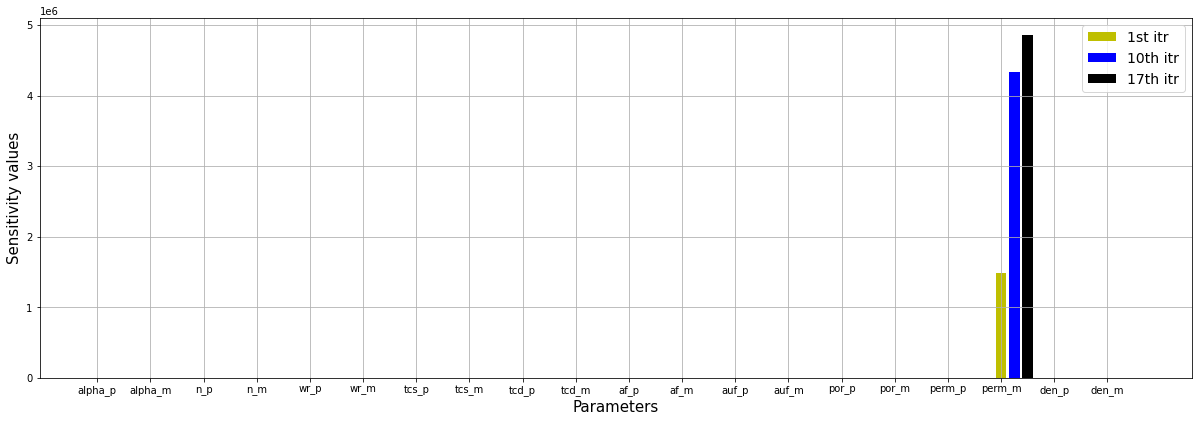

In [12]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(20) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, sen_iteration.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, sen_iteration.iloc[4,:], color='b', label='10th itr', width=0.2)
ax.bar(X + 0.5, sen_iteration.iloc[10,:], color='k', label='17th itr', width=0.2)
#ax.bar(X + 0.75, sen_iteration.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

##### Relative sensitivity values of all parameters

In [13]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = sen_iteration.iloc[i,:]/relative_set_itr.iloc[i,:].max()

relative_set_itr.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
1,1.642152e-11,1.991626e-10,4.905871e-13,9.291570e-13,9.127868e-12,8.596242e-12,2.971926e-12,3.126849e-13,2.897308e-12,2.936944e-13,4.563063e-14,4.282176e-14,1.362501e-12,3.363339e-14,3.438166e-12,3.483096e-12,0.000629,1.0,3.045903e-17,1.185232e-16
2,4.071039e-12,5.280501e-11,1.252649e-13,2.810930e-13,2.344036e-12,2.228623e-12,7.524716e-13,7.869895e-14,7.430556e-13,7.305386e-14,1.118000e-14,9.562988e-15,3.434560e-13,2.479138e-15,8.901767e-13,9.249046e-13,0.000119,1.0,1.184790e-17,3.133519e-17
3,1.539318e-11,6.476791e-11,3.744668e-13,3.311874e-13,2.102335e-12,2.148704e-12,8.012110e-13,8.032374e-14,6.863476e-13,7.617458e-14,2.570709e-14,1.081714e-14,3.180573e-13,1.290908e-15,9.136050e-13,8.742730e-13,0.000392,1.0,2.338039e-15,1.107741e-15
4,5.785513e-11,2.423603e-10,5.826289e-13,3.086661e-13,2.917716e-12,3.134133e-12,8.429851e-13,9.363864e-14,8.267325e-13,7.428994e-14,7.169746e-14,1.270744e-14,5.420308e-13,5.663924e-15,1.423365e-12,1.579535e-12,0.000650,1.0,3.326560e-15,1.575554e-15
5,5.787176e-11,2.423603e-10,5.826289e-13,3.086661e-13,2.917716e-12,3.134133e-12,8.429851e-13,9.363864e-14,8.267325e-13,7.428994e-14,7.169746e-14,1.270744e-14,5.420308e-13,5.791193e-15,1.423365e-12,1.579535e-12,0.000654,1.0,3.326560e-15,1.575739e-15


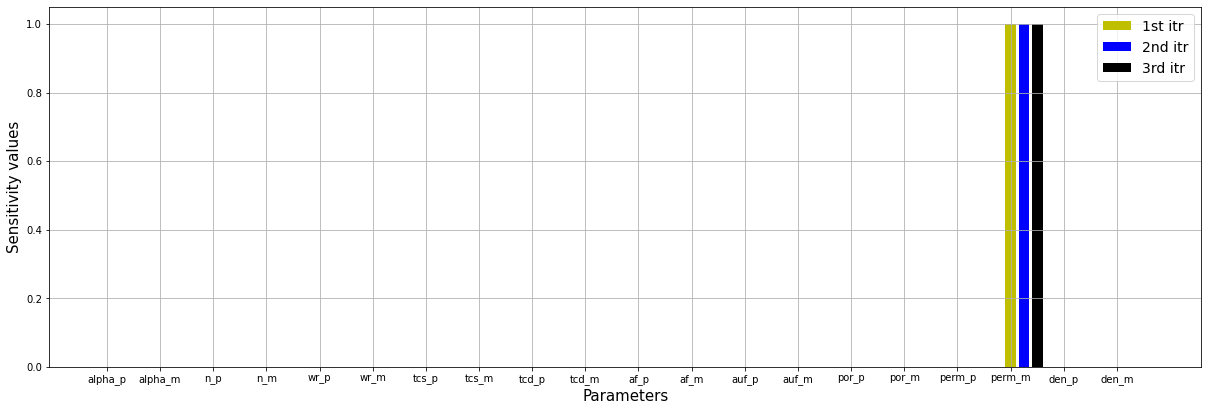

In [14]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(20) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, relative_set_itr.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, relative_set_itr.iloc[1,:], color='b', label='2nd itr', width=0.2)
ax.bar(X + 0.5, relative_set_itr.iloc[2,:], color='k', label='3rd itr', width=0.2)
#ax.bar(X + 0.75, relative_set_itr.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

### Plotting the change in parameters:


In [15]:
par_iteration = pd.read_csv(f'{directory_name}/{cf_name}.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
0,0.010000,0.001825,2.05000,2.05000,0.224324,0.159488,0.439577,0.952105,0.101023,0.984405,1.50511,1.49939,0.486935,0.698884,0.637395,0.481031,5.346620e-11,1.000000e-13,900,1900
1,0.010000,0.001956,2.04969,2.04999,0.226085,0.160214,0.439935,0.952066,0.101369,0.984410,1.50511,1.49939,0.486762,0.698884,0.638286,0.481240,4.392640e-11,2.500000e-14,900,1900
2,0.005458,0.001764,2.04969,2.04996,0.226962,0.160966,0.440268,0.952041,0.101729,0.984407,1.50511,1.49939,0.486627,0.698884,0.638286,0.481597,1.336660e-11,2.500000e-14,900,1900
3,0.002500,0.000978,2.04961,2.04995,0.227087,0.161055,0.440297,0.952038,0.101757,0.984407,1.50511,1.49939,0.486613,0.698884,0.638382,0.481638,1.336660e-11,2.500000e-14,900,1900
4,0.002500,0.000978,2.04961,2.04995,0.227088,0.161055,0.440297,0.952038,0.101757,0.984407,1.50511,1.49939,0.486613,0.698884,0.638382,0.481638,1.336660e-11,2.500000e-14,900,1900


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [16]:
par_change = par_iteration.copy()
#pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.columns):
        #print(i, j)
        #print(par_change.iloc[i,j])
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0,0
1,0.0000,7.166929,-0.015122,-0.000488,0.785025,0.455207,0.081442,-0.004096,0.342496,0.000508,0.0,0.0,-0.035528,0.0,0.139788,0.043448,-17.842674,-75.0,0,0
2,-45.4185,-3.332767,-0.015122,-0.001951,1.175978,0.926715,0.157197,-0.006722,0.698851,0.000203,0.0,0.0,-0.063253,0.0,0.139788,0.117664,-74.999906,-75.0,0,0
3,-75.0000,-46.385082,-0.019024,-0.002439,1.231701,0.982519,0.163794,-0.007037,0.726567,0.000203,0.0,0.0,-0.066128,0.0,0.154849,0.126187,-74.999906,-75.0,0,0
4,-75.0000,-46.385082,-0.019024,-0.002439,1.232146,0.982519,0.163794,-0.007037,0.726567,0.000203,0.0,0.0,-0.066128,0.0,0.154849,0.126187,-74.999906,-75.0,0,0


### Plotting the values in a logarithmic scale:

In [34]:
# Converting the values in log scale - Need to convert the type to float
rel_cases_log = np.log(sen_iteration.astype(float))
rel_cases_log.replace([np.inf, -np.inf], np.nan, inplace=True)
rel_cases_log.head()

,alpha_p,alpha_m,n_p,n_m,wr_p,wr_m,tcs_p,tcs_m,tcd_p,tcd_m,af_p,af_m,auf_p,auf_m,por_p,por_m,perm_p,perm_m,den_p,den_m
iteration,,,,,,,,,,,,,,,,,,,,
1,-10.624376,-8.128847,-14.135121,-13.496446,-11.211636,-11.271643,-12.333758,-14.585528,-12.359187,-14.648184,-16.510145,-16.573677,-13.113646,-16.815205,-12.188030,-12.175047,6.836035,14.208053,-23.822097,-22.463371
2,-10.660789,-8.098082,-14.142012,-13.333757,-11.212813,-11.263304,-12.349080,-14.606813,-12.361672,-14.681246,-16.558317,-16.714543,-13.133384,-18.064532,-12.181023,-12.142752,6.529578,15.566333,-23.408047,-22.435457
3,-9.262913,-7.826028,-12.979090,-13.101909,-11.253789,-11.231973,-12.218469,-14.518528,-12.373209,-14.571566,-15.657827,-16.523461,-13.142362,-18.649248,-12.087195,-12.131201,7.789417,15.634183,-18.055281,-18.802271
4,-8.291772,-6.859289,-12.889919,-13.525209,-11.278913,-11.207362,-12.520520,-14.718027,-12.539989,-14.949494,-14.985014,-16.715282,-12.962147,-17.523353,-11.996691,-11.892584,7.942874,15.281307,-18.055531,-18.802863
5,-8.291485,-6.859289,-12.889919,-13.525209,-11.278913,-11.207362,-12.520520,-14.718027,-12.539989,-14.949494,-14.985014,-16.715282,-12.962147,-17.501131,-11.996691,-11.892584,7.948219,15.281307,-18.055531,-18.802745


In [35]:
len(rel_cases_log)

11

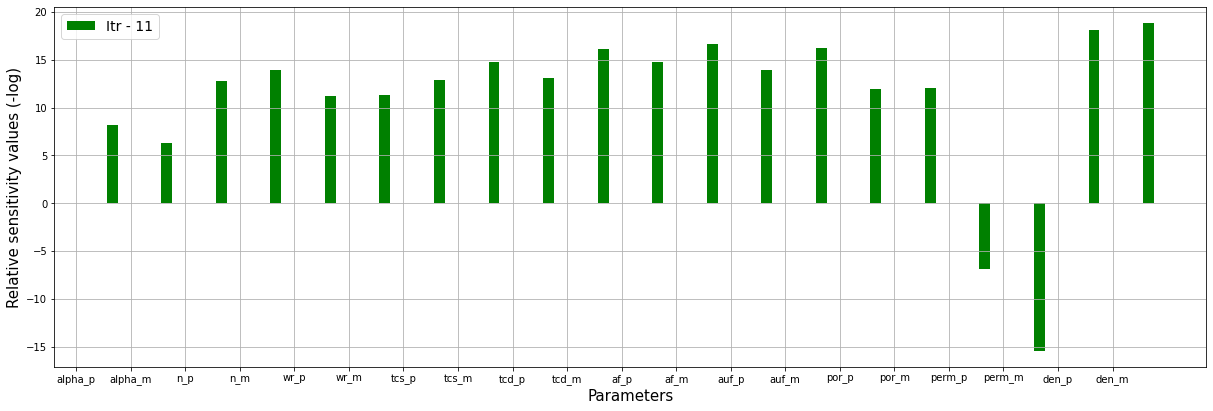

In [39]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = np.arange(20) # Number of parts to consider
x = len(rel_cases_log.index)

#ax.bar(X + 0.0, -rel_cases_log.iloc[0,:], color='y', label=f'Itr - 1', width=0.2)
#ax.bar(X + 0.33, -rel_cases_log.iloc[5,:], color='b', label=f'Itr - 6', width=0.2)
#ax.bar(X + 0.5, -rel_cases_log.iloc[2,:], color='k', label=f'{cf_name_3}', width=0.2)
ax.bar(X + 0.66, -rel_cases_log.iloc[10,:], color='g', label=f'Itr - 11', width=0.2)
#ax.bar(X + 0.25,-rel_set_itr_log.iloc[3,:], color='b', label='3rd itr', width=0.2)
#ax.bar(X + 0.5, -rel_set_itr_log.iloc[11,:], color='k', label='11th itr', width=0.2)
#ax.bar(X + 0.75,-rel_set_itr_log.iloc[9,:], color='g', label='9th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(rel_cases_log.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = rel_cases_log.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Relative sensitivity values (-log)', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b='True',which='both')

Comments:

    * Highly sensitive : Permeability - mineral and peat 
    * Medium sensitive : Alpha - mineral, peat
    * Less sensitive : porosity - peat and mineral, residual saturation - peat and mineral
    * The rest of the parameters are very less sensitive
    * Can we create a sensitivity index?

#### Line plot of all parameter values


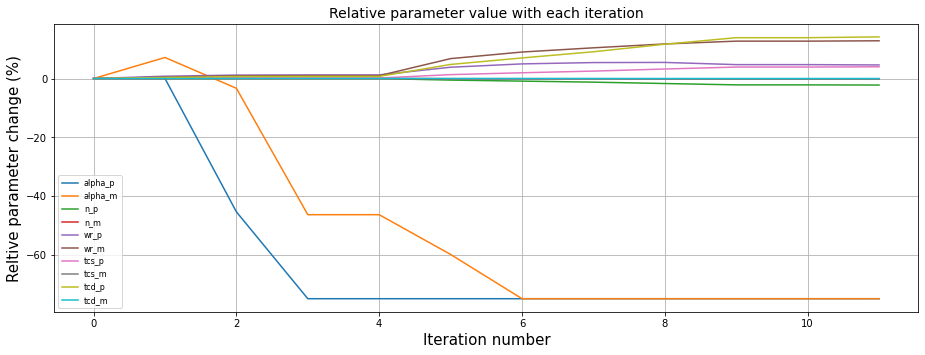

In [38]:
fig = plt.figure()
fig.set_size_inches(12,4)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.iloc[:,:10].columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

- The parameters : alpha_p, alpha_m has a greater change compared to the other parameters [0 - 75 %]
- The rest of the parameters vary by only 0 - 15 %

**Comments: Some of the parameters would like to vary more - Do we give them the oppurtunity?** 
    - The 

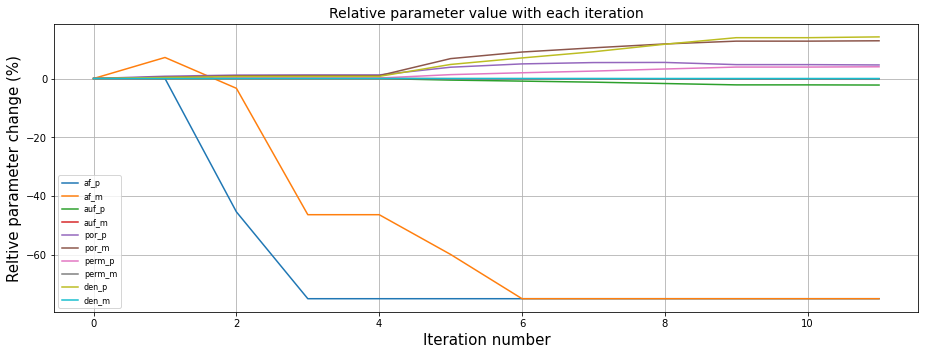

In [32]:
fig = plt.figure()
fig.set_size_inches(12,4)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.iloc[:,10:20].columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

- The parameters : af_p, af_m has a greater change compared to the other parameters [0 - 75 %]
- The rest of the parameters vary by only 0 - 15 %
- Although permeability is highly sensitive - Why does it not vary a lot? - Probably since we had already provided with the calibrated values!

### c. Objective function

In [40]:
no_iteration = np.arange(1,len(par_change.index),1)
no_iteration

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [41]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,len(par_change.index),1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/{cf_name}.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best
res_1.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,260.6422,270.150000,-9.507800,0.000076
1,stemp_0.04_1,temp,261.2884,262.894733,-1.606333,0.000076
2,stemp_0.04_2,temp,261.3255,262.058237,-0.732737,0.000076
3,stemp_0.04_3,temp,261.1522,261.616035,-0.463835,0.000076
4,stemp_0.04_4,temp,260.7784,261.099889,-0.321489,0.000076


#### Analyzing the residual weights:


In [42]:
res_1['Weight'].describe()

count    15344.000000
mean         0.000067
std          0.000009
min          0.000058
25%          0.000058
50%          0.000067
75%          0.000076
max          0.000076
Name: Weight, dtype: float64

In [43]:
res_1['Weight'].unique()

array([7.573979e-05, 5.806942e-05])

In [44]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [45]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,270.150000,-9.507800,0.000076,-0.000720,9.507800,0.000720,5.185711e-07,0.018932
1,stemp_0.04_1,temp,261.2884,262.894733,-1.606333,0.000076,-0.000122,1.606333,0.000122,1.480196e-08,0.000540
2,stemp_0.04_2,temp,261.3255,262.058237,-0.732737,0.000076,-0.000055,0.732737,0.000055,3.079957e-09,0.000112
3,stemp_0.04_3,temp,261.1522,261.616035,-0.463835,0.000076,-0.000035,0.463835,0.000035,1.234169e-09,0.000045
4,stemp_0.04_4,temp,260.7784,261.099889,-0.321489,0.000076,-0.000024,0.321489,0.000024,5.928996e-10,0.000022


In [46]:
res_phi_1['Weighted_Sq_Residual'].mean()

1.7851697781417702e-07

In [47]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i, value in enumerate(no_iteration):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi.head()

,obj_func
1,1.78517
2,1.630847
3,1.316774
4,1.316774
5,1.245819


In [48]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [50]:
directory_name

'Case1_B_cv_rw_slurm_jn.demo'

In [49]:
obj_iteration = pd.read_csv(f'{directory_name}/{cf_name}.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration.head()

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.002818,0.002818,0,0.000182,0.002636
1,31,0.002739,0.002739,0,0.000183,0.002557
2,61,0.002502,0.002502,0,0.000184,0.002319
3,111,0.002020,0.002020,0,0.000194,0.001827
4,161,0.002020,0.002020,0,0.000194,0.001827


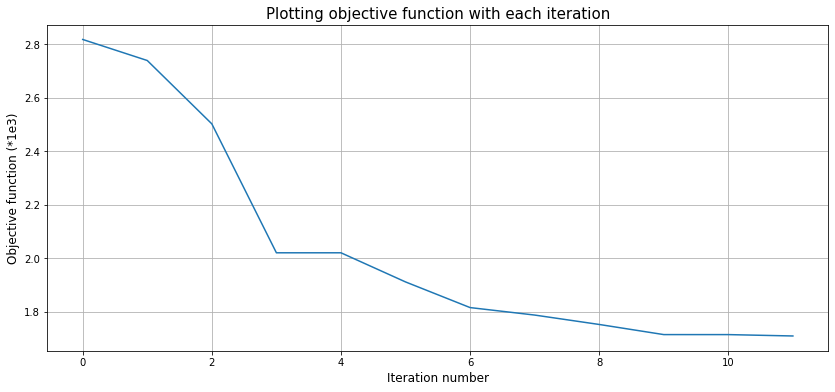

<Figure size 720x432 with 0 Axes>

In [51]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments:**

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [52]:
obj_iteration['total_phi'].idxmin()
# The iteration with the minimum objective function

11

In [53]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,270.150000,-9.507800,0.000076,-0.000720,9.507800,0.000720,5.185711e-07,0.030334
1,stemp_0.04_1,temp,261.2884,262.886706,-1.598306,0.000076,-0.000121,1.598306,0.000121,1.465440e-08,0.000857
2,stemp_0.04_2,temp,261.3255,262.064288,-0.738788,0.000076,-0.000056,0.738788,0.000056,3.131037e-09,0.000183
3,stemp_0.04_3,temp,261.1522,261.625630,-0.473430,0.000076,-0.000036,0.473430,0.000036,1.285760e-09,0.000075
4,stemp_0.04_4,temp,260.7784,261.107720,-0.329320,0.000076,-0.000025,0.329320,0.000025,6.221346e-10,0.000036


In [54]:
np.int(len(res_best)/2)

7672

In [55]:
temp_measured = res_best.iloc[:np.int(len(res_best)/2),2] # The 2nd column contains the measured values and we have only temperature values from the first half of the values
mois_measured = res_best.iloc[np.int(len(res_best)/2):,2]

temp_sim = res_best.iloc[:np.int(len(res_best)/2),3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[np.int(len(res_best)/2):,3]

temp_res = res_best.iloc[:np.int(len(res_best)/2),4] # The 4th column contains the residual values 
mois_res = res_best.iloc[np.int(len(res_best)/2):,4]

In [56]:
res_best.iloc[:np.int(len(res_best)/(2*7)),:].tail()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
1091,stemp_0.04_1091,temp,257.3359,257.233171,0.102729,0.000076,0.000008,0.102729,0.000008,6.053876e-11,0.000004
1092,stemp_0.04_1092,temp,257.1298,257.335322,-0.205522,0.000076,-0.000016,0.205522,0.000016,2.423055e-10,0.000014
1093,stemp_0.04_1093,temp,256.7739,256.963393,-0.189493,0.000076,-0.000014,0.189493,0.000014,2.059842e-10,0.000012
1094,stemp_0.04_1094,temp,256.4260,256.243019,0.182981,0.000076,0.000014,0.182981,0.000014,1.920705e-10,0.000011
1095,stemp_0.04_1095,temp,256.6415,257.049393,-0.407893,0.000076,-0.000031,0.407893,0.000031,9.544204e-10,0.000056


In [57]:
res_best.iloc[:np.int(len(res_best)/(2*7)),3].head()

0    270.150000
1    262.886706
2    262.064288
3    261.625630
4    261.107720
Name: Modelled, dtype: float64

### Importing the measured data:

In [58]:
#### Extracting the measured data
Yakou_measured_data = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv', sep='\t',index_col='TIMESTAMP')
Yakou_measured_data.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
TIMESTAMP,,,,,,,,,,,,,,,
2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [59]:
# Calculating the temperature in Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_values = 1096 # Number of time values

times = np.arange(1, time_values+1, 1)

# Adding column information:


x = 0
for i, depth in enumerate(depths):
        Yakou_measured_data[f'Soil temperature at - {depth} m (K)'] = Yakou_measured_data[f'Soil temperature at - {depth} m (°C)'] + 273.15

Yakou_measured_data['Soil temperature at - 0.04 m (K)'].head()

TIMESTAMP
2016-01-01    260.642153
2016-01-02    261.288403
2016-01-03    261.325486
2016-01-04    261.152153
2016-01-05    260.778403
Name: Soil temperature at - 0.04 m (K), dtype: float64

In [60]:
#depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

#depth_peat = 0.3

#poro_peat = 6.3739496E-01

#poro_mineral = 4.8103077E-01

#for i, depth in enumerate(depths):
    #if depth < depth_peat:
        #Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    #else:
        #Yakou_measured_data[f'point -{depth} saturation liquid'] = Yakou_measured_data[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

In [61]:
Yakou_measured_data.index = pd.to_datetime(Yakou_measured_data.index)

In [62]:
Yakou_measured_data.columns

Index(['Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.00 m (°C)',
       'Soil temperature at - 0.04 m (°C)', 'Soil temperature at - 0.1 m (°C)',
       'Soil temperature at - 0.2 m (°C)', 'Soil temperature at - 0.4 m (°C)',
       'Soil temperature at - 0.8 m (°C)', 'Soil temperature at - 1.2 m (°C)',
       'Soil temperature at - 1.6 m (°C)', 'Soil temperature at - 0.04 m (K)',
       'Soil temperature at - 0.1 m (K)', 'Soil temperature at - 0.2 m (K)',
       'Soil temperature at - 0.4 m (K)', 'Soil temperature at - 0.8 m (K)',
       'Soil temperature at - 1.2 m (K)', 'Soil temperature at - 1.6 m (K)'],
      dtype='object')

In [63]:
Yakou_mesdata_concise = Yakou_measured_data[['Soil moisture at - 0.04 m (%)', 'Soil moisture at - 0.1 m (%)',
       'Soil moisture at - 0.2 m (%)', 'Soil moisture at - 0.4 m (%)',
       'Soil moisture at - 0.8 m (%)', 'Soil moisture at - 1.2 m (%)',
       'Soil moisture at - 1.6 m (%)', 'Soil temperature at - 0.04 m (K)',
       'Soil temperature at - 0.1 m (K)', 'Soil temperature at - 0.2 m (K)',
       'Soil temperature at - 0.4 m (K)', 'Soil temperature at - 0.8 m (K)',
       'Soil temperature at - 1.2 m (K)', 'Soil temperature at - 1.6 m (K)']]

### Defining a new dataframe to store the simulated results!

In [64]:
case1_best_sim = pd.DataFrame(index=Yakou_mesdata_concise.index, columns=Yakou_mesdata_concise.columns)

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_values = 1096 # Number of time values

#times = np.arange(1, time_values+1, 1)


x = 0

for i, depth in enumerate(depths):
    for j in np.arange(time_values):
        case1_best_sim[f'Soil temperature at - {depth} m (K)'][j] = res_best.iloc[x,3]
        case1_best_sim[f'Soil moisture at - {depth} m (%)'][j] = res_best.iloc[x + np.int(len(res_best)/2),3]
        x = x + 1
        #print(j)
#print(x)

case1_best_sim.head()

,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.04 m (K),Soil temperature at - 0.1 m (K),Soil temperature at - 0.2 m (K),Soil temperature at - 0.4 m (K),Soil temperature at - 0.8 m (K),Soil temperature at - 1.2 m (K),Soil temperature at - 1.6 m (K)
TIMESTAMP,,,,,,,,,,,,,,
2016-01-01,16.012184,16.012184,16.012184,8.74081,8.74081,8.74081,8.74081,270.15,270.15,270.15,270.15,270.15,270.15,270.15
2016-01-02,16.010426,16.010771,16.011313,8.739301,8.740492,8.740767,8.740803,262.886706,266.200638,268.53415,269.401703,270.019448,270.133113,270.147341
2016-01-03,16.010373,16.010619,16.011032,8.738289,8.739826,8.740551,8.740739,262.064288,265.046982,267.561966,268.644793,269.704155,270.044754,270.12202
2016-01-04,16.010347,16.010552,16.010892,8.737704,8.739222,8.740238,8.740613,261.62563,264.406896,266.903363,268.046769,269.356252,269.907335,270.070882
2016-01-05,16.010319,16.010502,16.010798,8.73731,8.738724,8.739887,8.740434,261.10772,263.862745,266.366915,267.54339,269.01041,269.737253,269.994925


In [65]:
case1_best_sim.index = pd.to_datetime(case1_best_sim.index)
Yakou_mesdata_concise.index = pd.to_datetime(Yakou_mesdata_concise.index)

In [66]:
case1_best_sim.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=1096, freq=None)

Text(0.5, 0, 'Days')

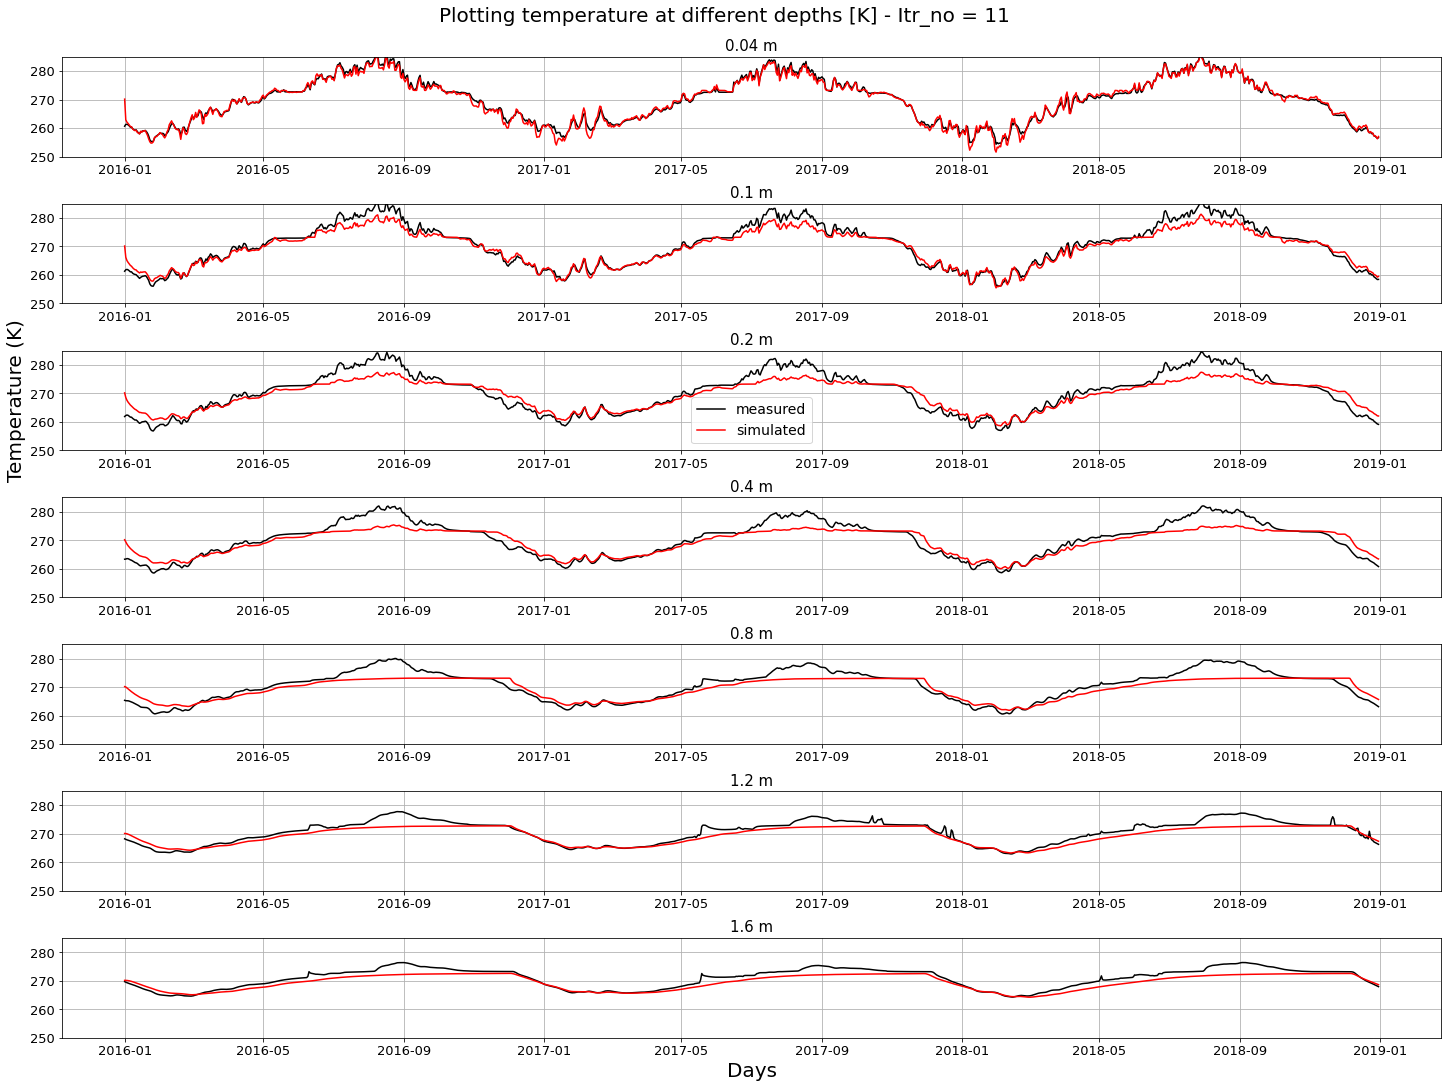

In [67]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

#time_period = np.arange(0,1096)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil temperature at - {depth} m (K)'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(case1_best_sim[f'Soil temperature at - {depth} m (K)'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax7.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

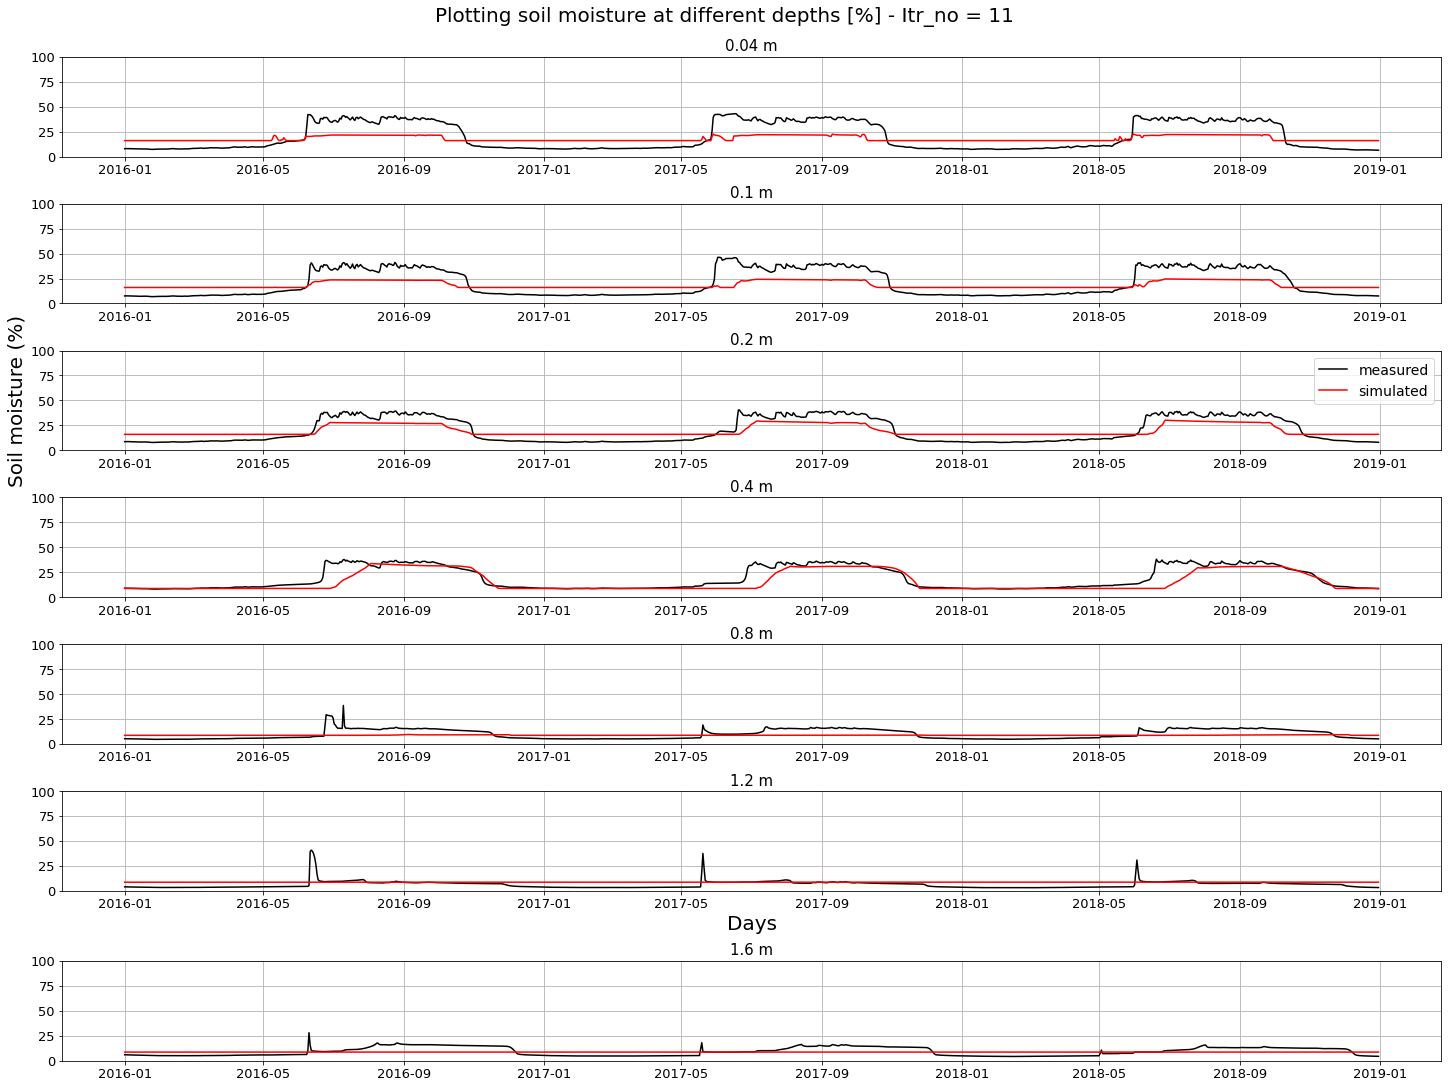

In [68]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])
f2_ax7 = fig2.add_subplot(spec2[6, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [%] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,1096)


for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(case1_best_sim[f'Soil moisture at - {depth} m (%)'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Soil moisture (%)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

### Looking closely for 1 year! - 2018

Text(0.5, 0, 'Days')

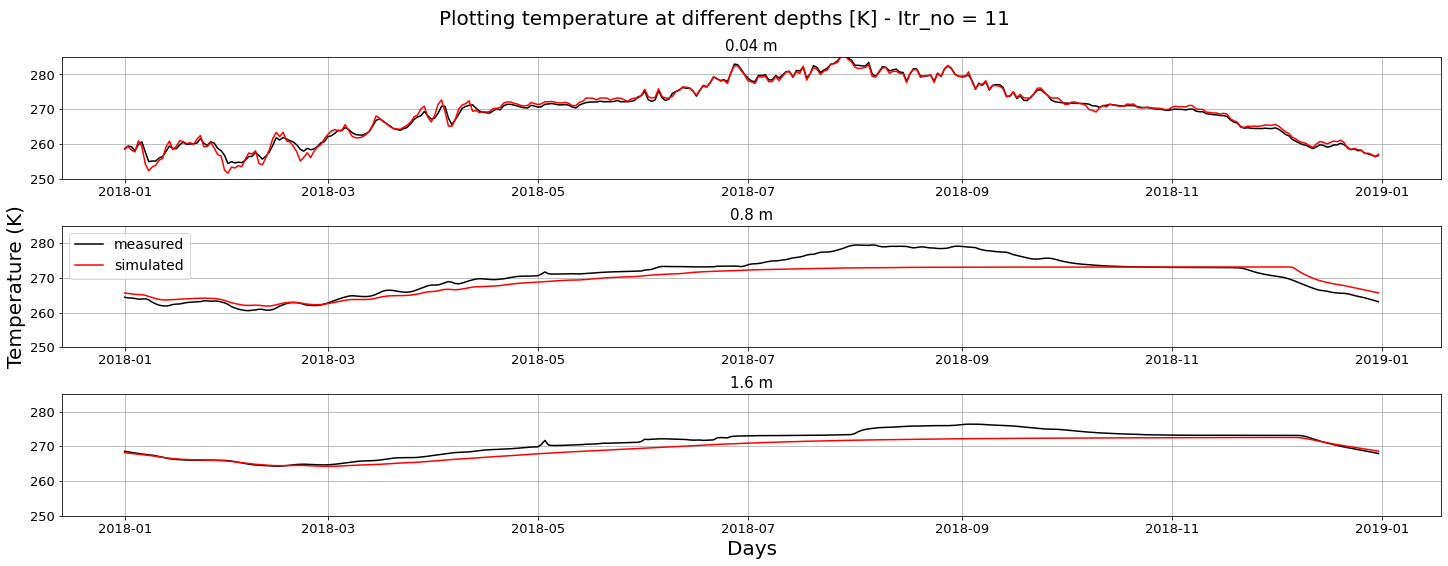

In [69]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])


fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.8, 1.6]

#time_period = np.arange(0,1096)


for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil temperature at - {depth} m (K)']['2018'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(case1_best_sim[f'Soil temperature at - {depth} m (K)']['2018'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(250,285)


    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax2.legend(fontsize=14)  
f2_ax2.set_ylabel('Temperature (K)', fontsize=20)
f2_ax3.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

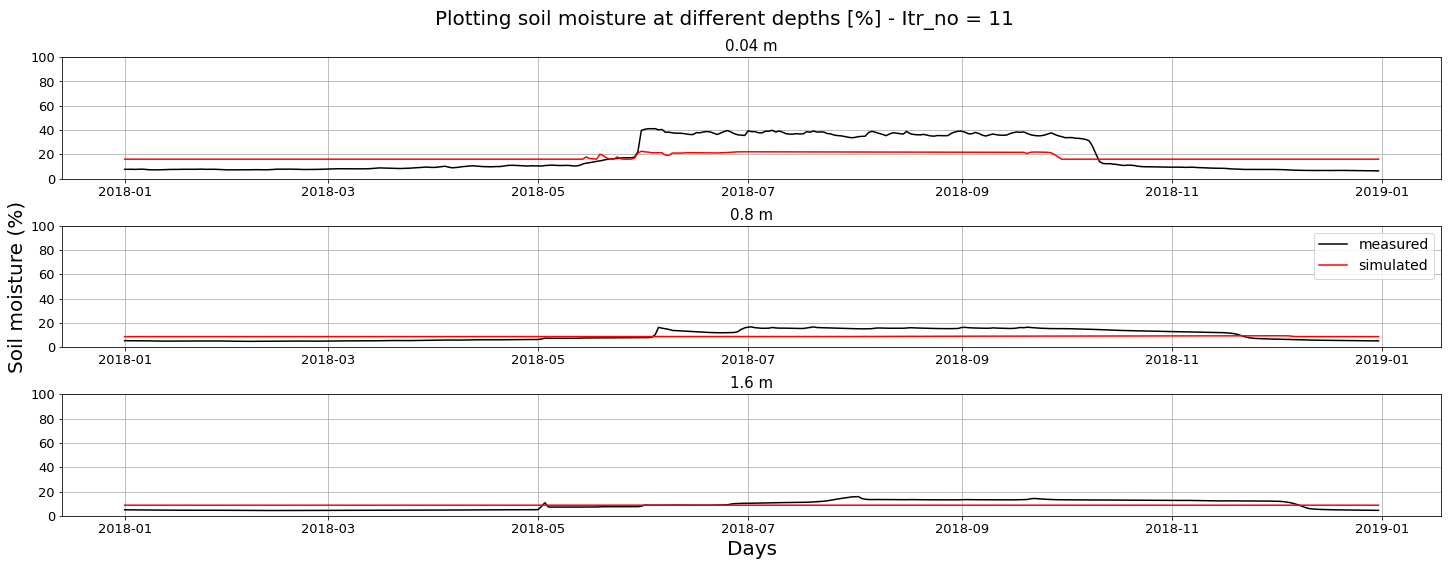

In [70]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=7, height_ratios=[1,1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])


fig2.suptitle(f'Plotting soil moisture at different depths [%] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.8, 1.6]

time_period = np.arange(0,1096)


for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(Yakou_mesdata_concise[f'Soil moisture at - {depth} m (%)']['2018'], 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(case1_best_sim[f'Soil moisture at - {depth} m (%)']['2018'], 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        

f2_ax2.legend(fontsize=14)  
f2_ax2.set_ylabel('Soil moisture (%)', fontsize=20)
f2_ax3.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. The estimates are such that the moisture is underestimated - The soil does not thaw that much in the above layers.

<Figure size 720x432 with 0 Axes>

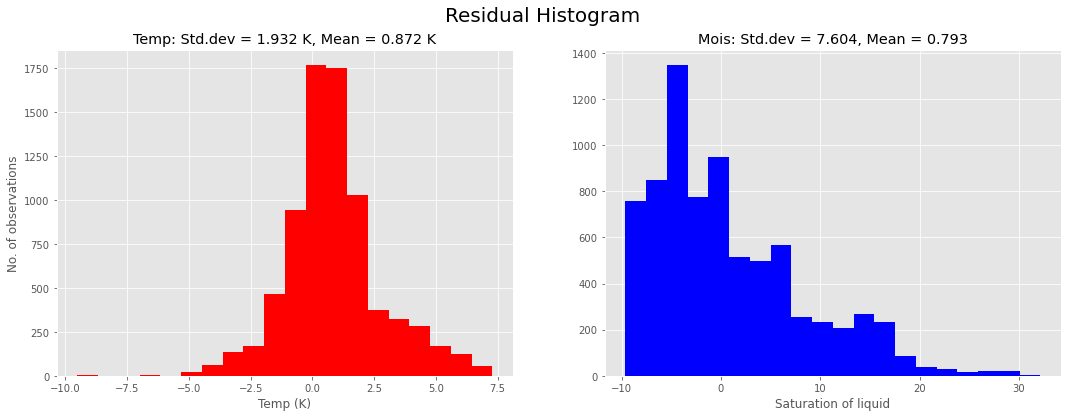

In [71]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [72]:
temp_res.describe()

count    7672.000000
mean        0.872250
std         1.931902
min        -9.507800
25%        -0.205311
50%         0.702852
75%         1.706688
max         7.291462
Name: Residual, dtype: float64

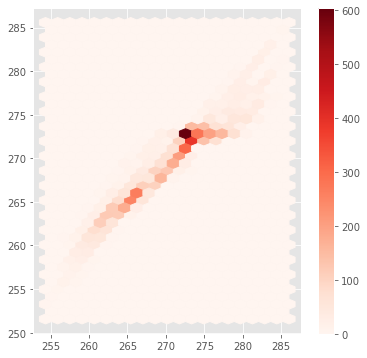

In [73]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

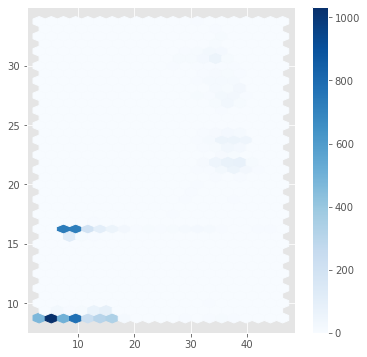

In [74]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

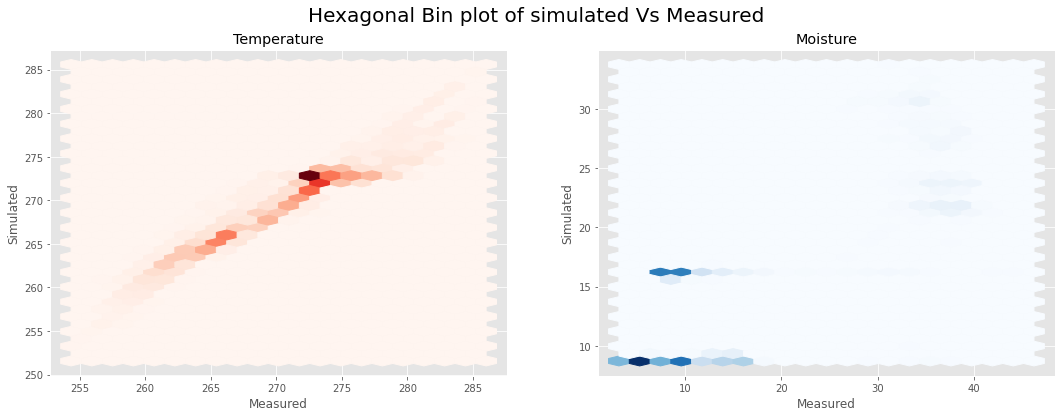

In [75]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [76]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.002818,0.002818,0,0.000182,0.002636
1,31,0.002739,0.002739,0,0.000183,0.002557
2,61,0.002502,0.002502,0,0.000184,0.002319
3,111,0.002020,0.002020,0,0.000194,0.001827
4,161,0.002020,0.002020,0,0.000194,0.001827
5,211,0.001912,0.001912,0,0.000197,0.001714
6,261,0.001816,0.001816,0,0.000204,0.001612
7,311,0.001788,0.001788,0,0.000204,0.001584
8,361,0.001753,0.001753,0,0.000202,0.001550
9,411,0.001715,0.001715,0,0.000198,0.001516


In [77]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([ 197.721, 1511.82 ])

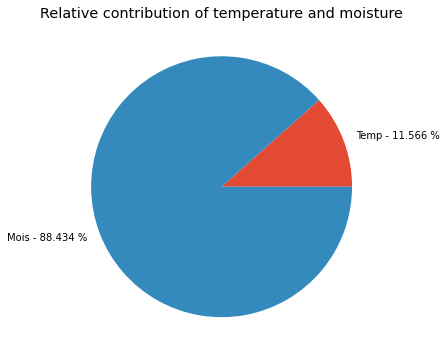

In [78]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

### How does the best parameters look like? Are they plausible? How do they compare with the other cases? Do we go for the case with optimal value or a case that shows more physical possibility?

In [79]:
itrno_best

11

In [80]:
par_iteration.loc[itrno_best,:]

alpha_p    2.500000e-03
alpha_m    4.562290e-04
n_p        2.004500e+00
n_m        2.048010e+00
wr_p       2.346970e-01
wr_m       1.799890e-01
tcs_p      4.571560e-01
tcs_m      9.496880e-01
tcd_p      1.153490e-01
tcd_m      9.845120e-01
af_p       1.504190e+00
af_m       1.499430e+00
auf_p      4.783240e-01
auf_m      6.988880e-01
por_p      6.821430e-01
por_m      4.852250e-01
perm_p     9.356590e-11
perm_m     2.500000e-14
den_p      9.000000e+02
den_m      1.900000e+03
Name: 11, dtype: float64

### Exporting the values:

The values are mainly exported for the best iteration i.e. with the least objective function.

In [81]:
os.getcwd()

'/home/rk/pestpp/pestpp/rk_model_final_4yrs'

In [82]:
itrno_best

11

#### 1. Parameters:

In [83]:
file_name_save = 'Case1_B_cv_slurm_jn'

In [84]:
### Best parameters:
best_params = par_iteration.loc[itrno_best,:]
### Saving it as a csv file
best_params.to_csv(f'Final_comp_cases_data/best_params_{file_name_save}.csv',sep=',')

#### 2. Residuals - Temperature and moisture

In [85]:
res_best.to_csv(f'Final_comp_cases_data/best_res_{file_name_save}.csv',sep=',')
Yakou_mesdata_concise.to_csv(f'Final_comp_cases_data/mes_data_{file_name_save}.csv',sep=',')
case1_best_sim.to_csv(f'Final_comp_cases_data/finalsim_{file_name_save}.csv',sep=',')

#### 3. Objective function

In [86]:
obj_iteration.to_csv(f'Final_comp_cases_data/obj_fn_{file_name_save}.csv',sep=',')

#### 4. Parameter sensitivity - best

In [87]:
sen_best = sen_iteration.loc[itrno_best,:]
sen_best.to_csv(f'Final_comp_cases_data/best_sen_{file_name_save}.csv',sep=',')

#### f. Identifibility tool - Identifiability is defined here as the capability of model calibration to constrain parameters used by a model.
- Go through the article and extract results later!

#### g. Plotting the covariance matrix for the variables